In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
# Load the CSV file
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns
import math
from scipy.stats import ttest_ind
from statistics import mean, stdev
from itertools import combinations


DTW,pelvis
     L0        L1        L2
0   0.0  -0.08778  0.407914
1   0.0  0.696681  1.846921
2   0.0  0.223022   0.32085
3   0.0  0.155272  0.372288
4   0.0  0.552162  0.710009
5   0.0  0.473966   0.62603
6   0.0  0.033613  0.344737
7   0.0 -0.034868  0.140266
8   0.0  0.036899  1.169969
9   0.0  0.619501  0.999974
10  0.0  0.543288  1.823185
MDP,pelvis
     L0        L1        L2
0   0.0  0.010707  0.058649
1   0.0  0.073837  0.201063
2   0.0  0.024526  0.010768
3   0.0  0.006626  -0.00245
4   0.0  0.049936  0.071477
5   0.0  0.061855  0.071613
6   0.0 -0.002456  0.020313
7   0.0 -0.001562  0.014206
8   0.0 -0.010076  0.081609
9   0.0 -0.001494  0.083993
10  0.0  0.027915  0.065488
HMM-SM,pelvis
     L0        L1        L2
0   0.0 -0.045143 -0.068976
1   0.0  0.050076 -0.005914
2   0.0 -0.024203  0.052119
3   0.0 -0.063755  0.024374
4   0.0 -0.039914  0.027416
5   0.0 -0.032856 -0.010923
6   0.0 -0.126117 -0.191881
7   0.0 -0.011415 -0.030081
8   0.0 -0.020614 -0.009508
9   0.0  -0.

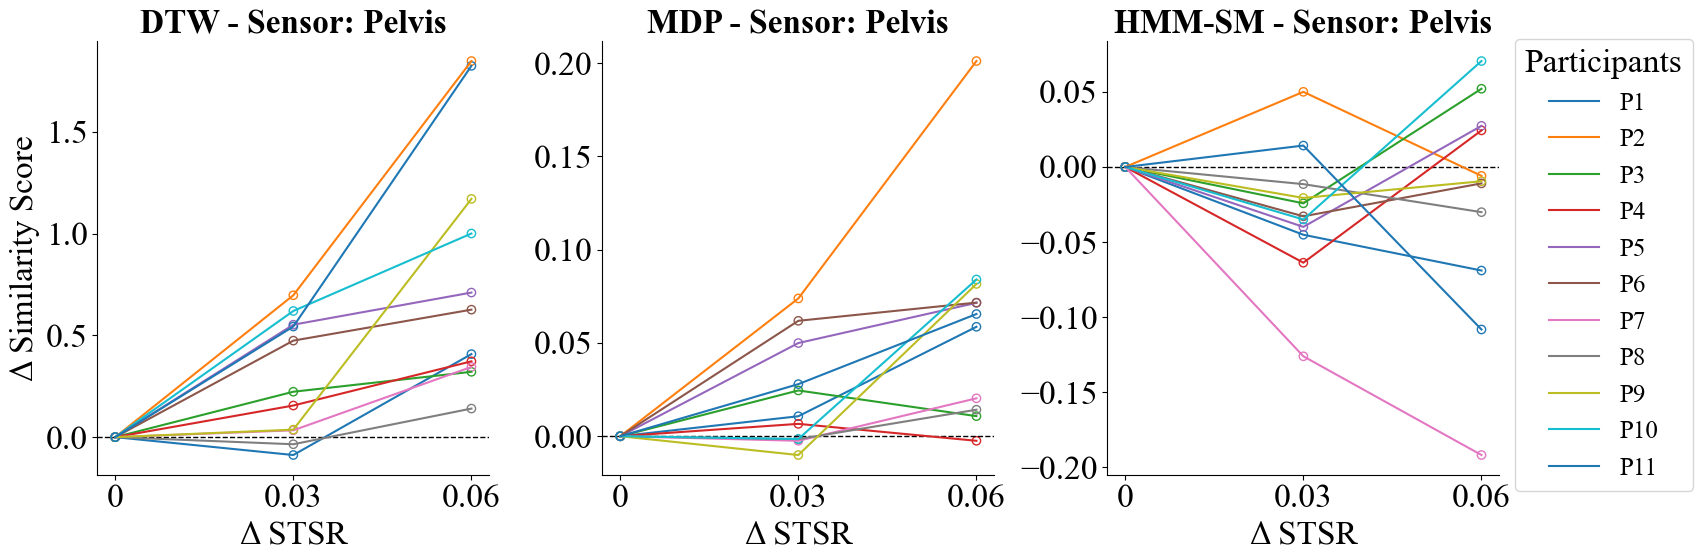

DTW,upper
     L0        L1        L2
0   0.0  1.953449  1.783259
1   0.0  0.134766  5.942102
2   0.0  1.574797  2.833501
3   0.0 -2.172514  1.220683
4   0.0  0.682353  2.611029
5   0.0  4.749121  3.578945
6   0.0 -0.760669  3.846181
7   0.0 -2.286561  1.261527
8   0.0  1.682504  2.294857
9   0.0  0.171551  2.021518
10  0.0  0.603956  1.220582
MDP,upper
     L0        L1        L2
0   0.0  0.219893  0.196354
1   0.0  0.061462  0.859793
2   0.0  0.115192  0.219968
3   0.0  -0.00338  0.074779
4   0.0  0.134179  0.356054
5   0.0  0.247094  0.188196
6   0.0 -0.035193  0.418497
7   0.0  -0.19061  0.112879
8   0.0   0.08355  0.192977
9   0.0  -0.09776  0.176997
10  0.0 -0.038368 -0.162723
HMM-SM,upper
     L0        L1        L2
0   0.0 -0.053464  0.008925
1   0.0  0.123676  0.105903
2   0.0 -0.029339 -0.021762
3   0.0  0.109791 -0.015076
4   0.0  0.117145  -0.17206
5   0.0  0.014137 -0.145043
6   0.0  0.025092 -0.017664
7   0.0 -0.175492 -0.107468
8   0.0  0.086379  0.177542
9   0.0  -0.062

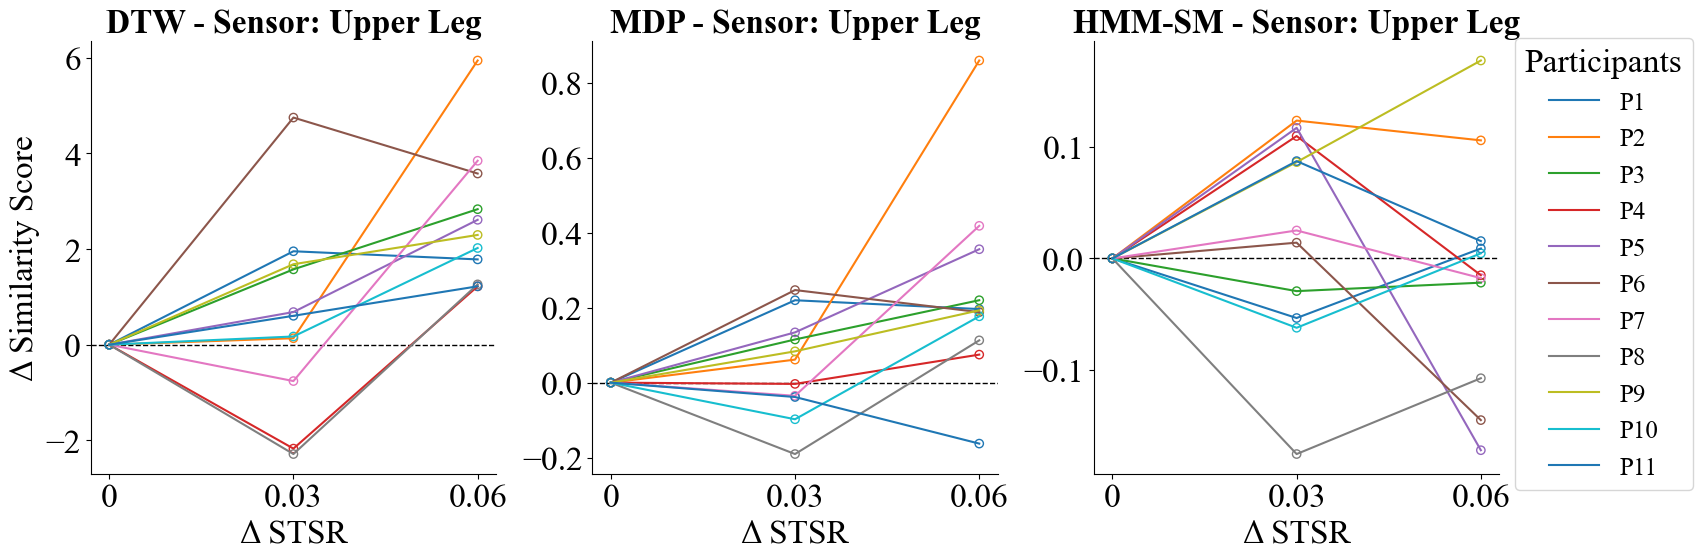

DTW,lower
     L0        L1        L2
0   0.0  0.947209  0.719843
1   0.0  1.067984  6.339528
2   0.0  1.749898  3.078787
3   0.0 -1.090559  2.196658
4   0.0  1.916129  2.604092
5   0.0   1.98931  3.244073
6   0.0  1.407426  5.434435
7   0.0  0.229361   3.49185
8   0.0  1.099804   2.83223
9   0.0  0.236375   2.01781
10  0.0  0.941732  3.240357
MDP,lower
     L0        L1        L2
0   0.0  0.102975  0.145253
1   0.0  0.161603  0.940268
2   0.0  0.099495  0.239778
3   0.0 -0.005675  0.174192
4   0.0  0.170025  0.328153
5   0.0  0.126044  0.270168
6   0.0  0.107436  0.502472
7   0.0  0.037992  0.386708
8   0.0  0.094174  0.440295
9   0.0 -0.017857  0.283017
10  0.0   0.06646  0.179138
HMM-SM,lower
     L0        L1        L2
0   0.0  0.170669  0.151253
1   0.0   0.03315 -0.116357
2   0.0 -0.154924 -0.099997
3   0.0 -0.036163 -0.111344
4   0.0  0.096105  -0.00061
5   0.0  0.057224  0.032535
6   0.0 -0.089044 -0.101139
7   0.0   0.03179  -0.02182
8   0.0  0.004771 -0.046568
9   0.0  0.0120

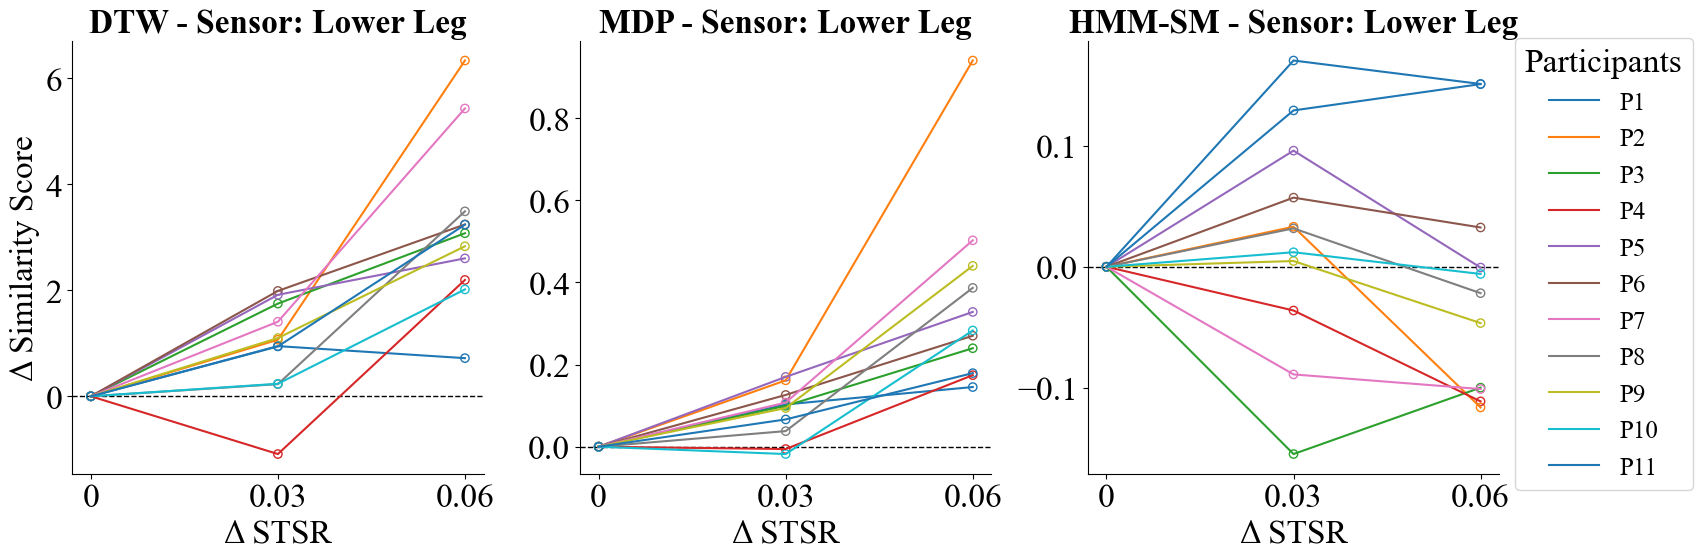

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the data
file_path = fr"Q:\main_propellab\Users\Ng, Gabe\Summer Student 2024\Manuscript\Results\GPS\logresults_16-08-24_18-14_GPS.csv"
data = pd.read_csv(file_path, header=None)
data.columns = ['FilePath', 'Sensor', 'GaitParam', 'Algorithm', 'Participant', 'X', 'Y']
data['Y'] = pd.to_numeric(data['Y'], errors='coerce')

def calculate_srm(col1, col2):
    valid_indices = ~col1.isna() & ~col2.isna()
    if np.any(valid_indices):
        mean_diff = np.mean(col1[valid_indices] - col2[valid_indices])
        std_diff = np.std((col1[valid_indices] - col2[valid_indices]), ddof=1)
        return mean_diff / std_diff
    else:
        return np.nan

def calculate_cohens_d(group1, group2):
    mean_diff = mean(group1) - mean(group2)
    pooled_std = np.sqrt((stdev(group1)**2 + stdev(group2)**2) / 2)
    return mean_diff / pooled_std

# Function to plot scatter plots
def plot_scatter(data, sensor):
    plt.rcParams["font.family"] = "serif"
    plt.rcParams["font.serif"] = "Times New Roman"

    sensor_titles = {'upper': 'Upper Leg', 'lower': 'Lower Leg', 'pelvis': 'Pelvis'}
    
    algorithms = list(data['Algorithm'].unique())
    
    #Makes sure it is the last one 
    if "HMM-SM" in algorithms:
        algorithms.remove("HMM-SM")
        algorithms.append("HMM-SM")
        
    colorslist = plt.rcParams['axes.prop_cycle'].by_key()['color']
    colors = [colorslist[i % len(colorslist)] for i in range(11)]
    
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # Create a figure for subplots
    
    for idx, algorithm in enumerate(algorithms):
        subset = data[(data['Algorithm'] == algorithm) & (data['Sensor'] == sensor)]
        df = pd.DataFrame(columns=['L0', 'L1', 'L2'], index=range(len(subset['Participant'].unique())))
        df_ydiff = pd.DataFrame(columns=['L0', 'L1', 'L2'], index=range(len(subset['Participant'].unique())))
        if not subset.empty:
            ax = axs[idx]
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.axhline(y=0,linestyle='--',linewidth=1,color='k')
            for i, participant in enumerate(subset['Participant'].unique()):
                participant_data = subset[subset['Participant'] == participant].copy()
                if algorithm == "HMM-SM":
                    participant_data = participant_data.iloc[1:]  # Remove the first entry for HMM-SM
                Y = participant_data['Y']
                participant_data['Y_diff'] = participant_data['Y'] - participant_data['Y'].iloc[0]
                Y_diff = participant_data['Y_diff'].values.tolist()
                df.loc[i] = Y
                
                df_ydiff.loc[i] = Y_diff
                ax.plot(['0', '0.03', '0.06'], Y_diff, label=f"P{i+1}")
                ax.scatter(['0', '0.03', '0.06'], Y_diff, marker='o', edgecolors=colors[i], facecolors='none')
                #ax.set_ylim(bottom=0)
            ax.set_xlabel("Δ STSR", fontsize=24)
            ax.tick_params(axis='both', which='major', labelsize=24)
            if idx == 0:
                ax.set_ylabel("Δ Similarity Score", fontsize=24)  # Only on the leftmost plot
            ax.set_title(f"{algorithm} - Sensor: {sensor_titles[sensor]}", fontsize=24, fontweight='bold')
            print(f"{algorithm},{sensor}")
            print(df_ydiff)
    # Single legend outside the plot, but closer to the subplots
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='center right', bbox_to_anchor=(0.95, 0.5), title="Participants",fontsize=18,title_fontsize=24)
    
    # Adjust the layout to prevent overlapping
    plt.tight_layout(rect=[0, 0, 0.85, 0.95])  # Adjust rect to leave space for the title and legend
    
    sensor_titles = {'upper': 'Upper Leg', 'lower': 'Lower Leg', 'pelvis': 'Pelvis'}
    #plt.suptitle(f"Sensor: {sensor_titles[sensor]}", x=0.5,y=1, fontsize=18)  # Larger sensor title, not bold
    
    #plt.savefig(fr"Q:\main_propellab\Users\Ng, Gabe\Summer Student 2024\Manuscript\Results\STSR\logresults_16-08-24_23-07_{sensor}_Scatter_STSR.svg", bbox_inches='tight')
    plt.show()

# Function to plot error bar plots
def plot_error_bars(data, sensor):
    sensor_titles = {'upper': 'Upper Leg', 'lower': 'Lower Leg', 'pelvis': 'Pelvis'}
    algorithms = list(data['Algorithm'].unique())
    
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # Create a figure for subplots
    
    for idx, algorithm in enumerate(algorithms):
        subset = data[(data['Algorithm'] == algorithm) & (data['Sensor'] == sensor)]
        df = pd.DataFrame(columns=['L0', 'L1', 'L2'], index=range(len(subset['Participant'].unique())))
        
        if not subset.empty:
            ax = axs[idx]
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            
            for i, participant in enumerate(subset['Participant'].unique()):
                participant_data = subset[subset['Participant'] == participant].copy()
                if algorithm == "HMM-SM":
                    participant_data = participant_data.iloc[1:]  # Remove the first entry for HMM-SM
                Y = participant_data['Y']
                df.loc[i] = Y
                
            #print(df)
            mean_values = df.mean()
            #print(mean_values)
            sem_values = df.sem()
            x_labels = df.columns
            ax.errorbar(['0', '0.4', '0.8'], mean_values[1:], yerr=1.96 * sem_values[1:], fmt='o', capsize=5, color='black')
            ax.set_xlabel('Δ GPS', fontsize=14)
            ax.set_xticklabels()
            if idx == 0:
                ax.set_ylabel('Similarity', fontsize=14)  # Only on the leftmost plot
            ax.set_title(f"{algorithm} - Sensor: {sensor_titles[sensor]}", fontsize=14, fontweight='bold')
    
    sensor_titles = {'upper': 'Upper Leg', 'lower': 'Lower Leg', 'pelvis': 'Pelvis'}
    #plt.suptitle(f"Sensor: {sensor_titles[sensor]}", x=0.5,y=1, fontsize=18)  # Larger sensor title, not bold
    
    #plt.savefig(f"Q:\main_propellab\Users\Ng, Gabe\Summer Student 2024\Manuscript\Results\GPS\logresults_16-08-24_18-14_GPS_{sensor}_ErrorBars_GPS.svg", bbox_inches='tight')
    plt.show()

sensors = data['Sensor'].unique()

# Plot for each sensor across all algorithms
for sensor in sensors:
    plot_scatter(data, sensor)
    #plot_error_bars(data, sensor)

In [1]:



import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
# Load the CSV file
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns
import math
from scipy.stats import ttest_ind
from statistics import mean, stdev
from itertools import combinations
import pingouin as pg
import os


t_test_results = {}
file_path = r"C:\GP-WearablesAnalysis\examples\logresults_16-08-24_13-20_STSR.csv"
data = pd.read_csv(file_path, header=None)
data.columns = ['FilePath', 'Sensor', 'GaitParam', 'Algorithm', 'Participant', 'X', 'Y']
data['Y'] = pd.to_numeric(data['Y'], errors='coerce')

# Function to perform paired t-tests and apply BH correction
def analysis_byalgorithm(data, algorithm, sensor):
    
    # Initialize DataFrame to hold data for each participant
    
    subset = data[(data['Algorithm'] == algorithm) & (data['Sensor'] == sensor)]
    print(f'Generating results for {algorithm}, {sensor}, number of data points: {len(subset)}')
    df = pd.DataFrame(columns=['L0', 'L1','L2'], index=range(len(data['Participant'].unique())))  # Initialize outside the loop
    
    if not subset.empty:
        for i, participant in enumerate(subset['Participant'].unique()):
            participant_data = subset[subset['Participant'] == participant].copy()
            if algorithm == "HMM-SM":
                participant_data = participant_data.iloc[1:] #Existing data also contains the BL-BL comparison (between trained models). Want to remove this.
            Y = participant_data['Y'].values.tolist()
            df.loc[i] = Y     
       
    # Drop participants with any missing data across the conditions
    df.dropna(inplace=True)
    print(df)
    if df.empty:
        print("No complete data available for paired t-tests.")
        return
    
    # List of columns (conditions) to compare
    columns = df.columns.tolist()
    
    # Generate all unique pairs of conditions
    pairs = list(combinations(columns, 2))
    
    # Exclude specific pairs if necessary
    #excluded_pairs = [('BL', 'L1'), ('BL', 'L2'),('BL', 'L0')]  # Exclude comparisons to the second baseline group
    filtered_pairs = [pair for pair in pairs]
    
    # Prepare lists to store p-values and their corresponding pairs
    p_values = []
    p_value_pairs = []
    t_test_results = {}
    
    # Perform paired t-tests using pingouin and calculate SRM
    for col1, col2 in filtered_pairs:
        data1 = df[col1].astype(float)
        data2 = df[col2].astype(float)
        
        
        # Calculate SRM
        difference = data1 - data2
        mean_diff = np.mean(difference)
        std_diff = np.std(difference, ddof=1)
        srm = mean_diff / std_diff if std_diff != 0 else np.nan
        normality_res = pg.normality(difference)
        p_normality = normality_res['pval'].values[0]
        
        if p_normality > 0.05:
            print("Data is normally distributed")
            pair_name = f'{col1}_vs_{col2}'
            # Perform paired t-test
            ttest_res = pg.ttest(data1, data2, paired=True)
            t_stat = ttest_res['T'].values[0]
            p_val = ttest_res['p-val'].values[0]
            t_test_results[pair_name] = {'t_statistic': t_stat, 'p_value': p_val, 'srm': srm}
        else:
            print("Data is not normally distributed")
            pair_name = f'{col1}_vs_{col2}'
            ttest_res = pg.ttest(data1, data2, paired=True)
            t_stat = ttest_res['T'].values[0]
            p_val = ttest_res['p-val'].values[0]
            t_test_results[pair_name] = {'t_statistic': t_stat, 'p_value': p_val, 'srm': srm}
        
        # Collect p-values for BH correction
        p_values.append(p_val)
        p_value_pairs.append(pair_name)
    
    # Apply Benjamini-Hochberg correction
    bh_results = pg.multicomp(p_values, method='fdr_bh')
    corrected_p_values = bh_results[1]
    
    # Map corrected p-values to their corresponding pairs
    corrected_p_value_mapping = dict(zip(p_value_pairs, corrected_p_values))
    
    # Display results
    for pair in t_test_results:
        t_stat = t_test_results[pair]['t_statistic']
        raw_p_val = t_test_results[pair]['p_value']
        corrected_p_val = corrected_p_value_mapping[pair]
        srm = t_test_results[pair]['srm']
        significance = 'Yes' if corrected_p_val < 0.05 else 'No'
        
        print(f"{pair}: t-statistic = {t_stat:.3f}, "
              f"p-value = {raw_p_val:.3f}, "
              f"BH-adjusted p-value = {corrected_p_val:.3f}, "
              f"SRM = {srm:.3f}, "
              f"Significant = {significance}")
    
    # Append t-test results to CSV
    csv_file2 = r"C:\GP-WearablesAnalysis\examples\logresults_16-08-24_13-20_STSR_Statistics_results.csv"
    if not os.path.exists(csv_file2):
        with open(csv_file2, "w") as file:
            file.write("Algorithm,Sensor,Comparison,T-statistic,Raw p-value,BH-adjusted p-value,SRM\n")
            
    # Prepare data for CSV
    with open(csv_file2, "a") as file:
        for pair in t_test_results:
            t_stat = t_test_results[pair]['t_statistic']
            raw_p_val = t_test_results[pair]['p_value']
            corrected_p_val = corrected_p_value_mapping[pair]
            srm = t_test_results[pair]['srm']
            if not os.path.exists(csv_file2):
                file.write(f"{algorithm}, {sensor}, {pair}, {t_stat}, {raw_p_val}, {corrected_p_val}, {srm}\n")
    
    print(f"Results appended to {csv_file2}")

# Get unique combinations of sensors and algorithms
sensors = data['Sensor'].unique()
algorithms = data['Algorithm'].unique()

# Perform analysis for each combination of sensor and algorithm
for sensor in sensors:
    for algorithm in algorithms:
        analysis_byalgorithm(data, algorithm, sensor)


Generating results for DTW, pelvis, number of data points: 33
           L0         L1         L2
0   17.212967   15.73653  15.964791
1   16.469304  16.594263  16.039862
2   10.188091  10.414128  10.378146
3   14.505012  14.076522  14.260526
4   18.496761  18.535391  17.942449
5   17.321716  17.324329  17.771173
6   12.331017   11.80899  11.683521
7   12.770234  12.668555  13.261765
8   12.617161  12.565766   12.26369
9   15.644134  16.331891  16.089443
10  15.945659  15.783457  15.675426
Data is normally distributed
Data is normally distributed
Data is normally distributed
L0_vs_L1: t-statistic = 0.920, p-value = 0.379, BH-adjusted p-value = 0.569, SRM = 0.278, Significant = No
L0_vs_L2: t-statistic = 1.200, p-value = 0.258, BH-adjusted p-value = 0.569, SRM = 0.362, Significant = No
L1_vs_L2: t-statistic = 0.403, p-value = 0.696, BH-adjusted p-value = 0.696, SRM = 0.121, Significant = No
Results appended to C:\GP-WearablesAnalysis\examples\logresults_16-08-24_13-20_STSR_Statistics_res

In [3]:
""" T-test, benjamini-hochberg correction and SRM for each comparison level"""
import numpy as np
import pandas as pd
import pingouin as pg
import os
from itertools import combinations

# Function to calculate SRM
def calculate_srm(data1, data2):
    difference = data1 - data2
    mean_diff = np.mean(difference)
    std_diff = np.std(difference, ddof=1)
    return mean_diff / std_diff if std_diff != 0 else np.nan

# Reading the data
file_path = r"Q:\main_propellab\Users\Ng, Gabe\Summer Student 2024\Manuscript\PrePostPT_Investigation\Results\Trial #3 - Gyro Data\PTlogresults_21-08-24_22-48.csv"
#data = pd.read_csv(file_path, header=None)
data = pd.read_csv(file_path)
data.columns = ['FilePath', 'Sensor', 'GaitParam', 'Algorithm', 'Participant', 'X', 'Y']
data['Y'] = pd.to_numeric(data['Y'], errors='coerce')
data['X'] = pd.to_numeric(data['X'], errors='coerce')

def analysis_byalgorithm(data, algorithm, sensor, parametric=True, correction='fdr_bh'):
    subset = data[(data['Algorithm'] == algorithm) & (data['Sensor'] == sensor)]
    print(f'Generating results for {algorithm}, {sensor}, number of data points: {len(subset)}')

    df = pd.DataFrame(columns=['Pre-Rehab','Post-Rehab'], index=range(len(data['Participant'].unique())))  # Initialize outside the loop
    
    if not subset.empty:
        for i, participant in enumerate(subset['Participant'].unique()):
            participant_data = subset[subset['Participant'] == participant].copy()
            if algorithm == "HMM-SM":
                participant_data = participant_data.iloc[1:]  # Remove the first entry for HMM-SM
            Y = participant_data['Y'].values.tolist()
            X = participant_data['X'].values.tolist()
            df.loc[i] = Y

    df.dropna(inplace=True)

    if df.empty:
        print("No complete data available for pairwise comparisons.")
        return
    print(df)
   
    df_melted = df.reset_index().melt(id_vars=['index'], var_name='Level', value_name='Y')
    df_melted.rename(columns={'index': 'Participant'}, inplace=True)
    df_melted['Y'] = pd.to_numeric(df_melted['Y'], errors='coerce')
    df_melted.dropna(subset=['Y'], inplace=True)

    
    results = pg.pairwise_tests(
        dv='Y', 
        within='Level', 
        subject='Participant', 
        data=df_melted, 
        parametric=parametric, 
        padjust=correction, 
        effsize='cohen'
    )

    # Calculate SRM for each comparison
    srm_values = {}
    normality = {}
    levels = ['Pre-Rehab', 'Post-Rehab']
    pairs = list(combinations(levels, 2))
    for level1, level2 in pairs:
        data1 = df[df.columns[df.columns.get_loc(level1)]].astype(float)
        data2 = df[df.columns[df.columns.get_loc(level2)]].astype(float)
        
        if not data1.empty and not data2.empty:
            difference = data1 - data2
            mean_diff = np.mean(difference)
            std_diff = np.std(difference, ddof=1)
            srm =  mean_diff / std_diff if std_diff != 0 else np.nan
            srm_values[f'{level1}_vs_{level2}'] = srm
            
            normality_res = pg.normality(difference)
            p_normality = normality_res['pval'].values[0]
        
            if p_normality > 0.05:
                normality_value = True
            else:
                normality_value = p_normality
            normality[f'{level1}_vs_{level2}'] = normality_value
        else:
            print(f"Data for {level1} or {level2} is empty.")
            srm_values[f'{level1}_vs_{level2}'] = np.nan

    results['Sensor'] = sensor
    results['Algorithm'] = algorithm
    results['SRM'] = results.apply(lambda row: srm_values.get(f'{level1}_vs_{level2}', np.nan), axis=1)
    results['Normality'] = results.apply(lambda row: normality.get(f'{level1}_vs_{level2}', np.nan), axis=1)
    # Reorder columns to make 'Sensor' and 'Algorithm' the leftmost columns
    results = results[['Sensor', 'Algorithm'] + [col for col in results.columns if col not in ['Sensor', 'Algorithm']]]


    directory, filename = os.path.split(file_path)
    basename, ext = os.path.splitext(filename)
    new_filename = f"{basename}_statistics{ext}"

    output_file_path = os.path.join(directory, new_filename)
    if not os.path.exists(output_file_path):
        results.to_csv(output_file_path, index=False)
    else:
        results.to_csv(output_file_path, mode='a', header=False, index=False)

    print(f"Results appended to {output_file_path}")

# Get unique combinations of sensors and algorithms
sensors = data['Sensor'].unique()
algorithms = data['Algorithm'].unique()

# Perform analysis for each combination of sensor and algorithm
for sensor in sensors:
    for algorithm in algorithms:
        analysis_byalgorithm(data, algorithm, sensor, parametric=False, correction='fdr_bh')  # Set parametric to True or False as needed

Generating results for DTW, pelvis, number of data points: 24
   Pre-Rehab Post-Rehab
0   7.518122   7.204256
1   4.429132   5.574897
2   3.034778   3.872232
3   4.622113   5.482674
4   4.655874    5.90667
5    2.86416    4.52121
6   7.279155   7.297427
7   2.518853   4.022306
8   4.821705   6.234149
9   2.396127   2.726065
10  4.866773   5.200908
11  3.571829   4.093316
Results appended to Q:\main_propellab\Users\Ng, Gabe\Summer Student 2024\Manuscript\PrePostPT_Investigation\Results\Trial #3 - Gyro Data\PTlogresults_21-08-24_20-50_statistics.csv
Generating results for MDP, pelvis, number of data points: 24
   Pre-Rehab Post-Rehab
0   0.256193   0.241929
1    0.17637   0.264317
2   0.131825   0.159268
3   0.210316     0.2599
4   0.207283   0.223389
5   0.138232   0.256406
6    0.25924   0.247571
7   0.132746   0.202337
8    0.25553   0.342236
9   0.112427   0.121482
10  0.212904   0.162518
11  0.190701   0.230416
Results appended to Q:\main_propellab\Users\Ng, Gabe\Summer Student 2024

Generating results for DTW, pelvis, number of data points: 24
0    -0.180332
1     1.175853
2     0.873670
3     0.892499
4     1.079333
5     1.672042
6    -0.386724
7     1.321901
8     1.420409
9     0.346800
10    0.371941
11    0.539598
Name: Δ Similarity, dtype: float64
Generating results for MDP, pelvis, number of data points: 24
0    -0.013626
1     0.080876
2     0.034531
3     0.050390
4     0.009262
5     0.115629
6    -0.039768
7     0.066017
8     0.089032
9     0.005663
10   -0.042657
11    0.037699
Name: Δ Similarity, dtype: float64
Generating results for HMM-SM, pelvis, number of data points: 36
0    -0.458088
1    -0.051717
2    -0.167887
3    -0.083676
4    -0.226056
5    -0.316660
6    -0.184668
7    -0.004846
8    -0.126059
9    -0.148131
10   -0.106615
11   -0.012332
Name: Δ Similarity, dtype: float64
Generating results for DTW, Upper, number of data points: 24
0     0.653020
1     1.755986
2     1.317485
3     3.913034
4     3.026766
5     3.115829
6    -1.347942


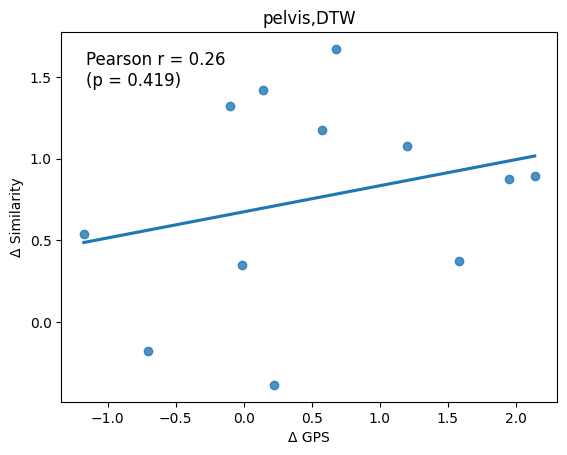

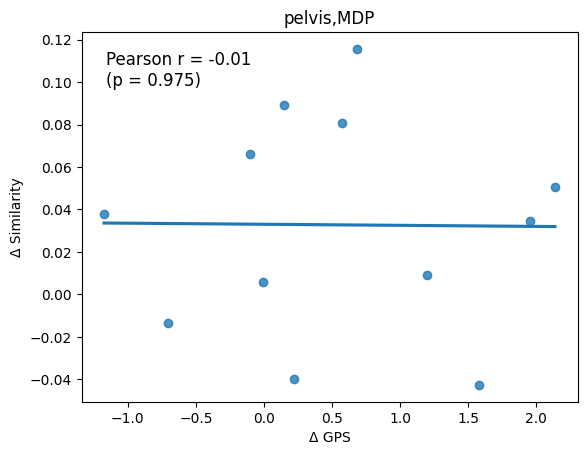

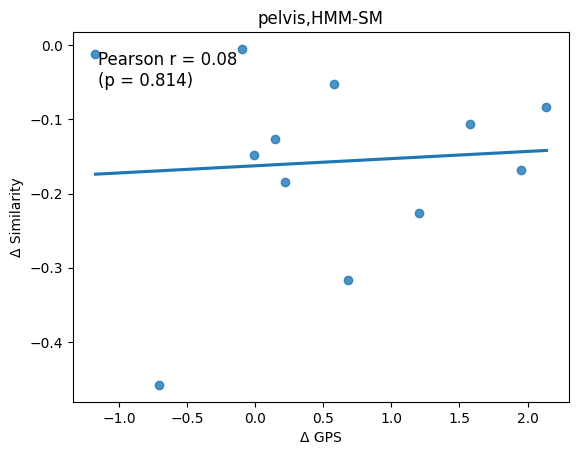

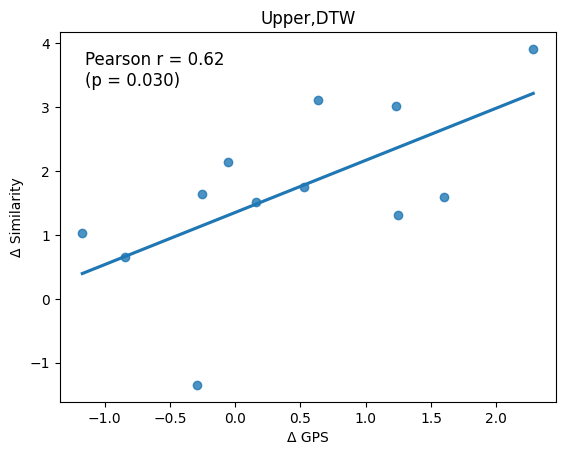

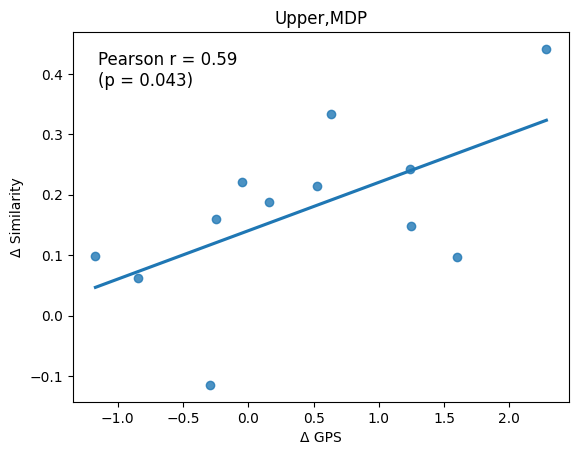

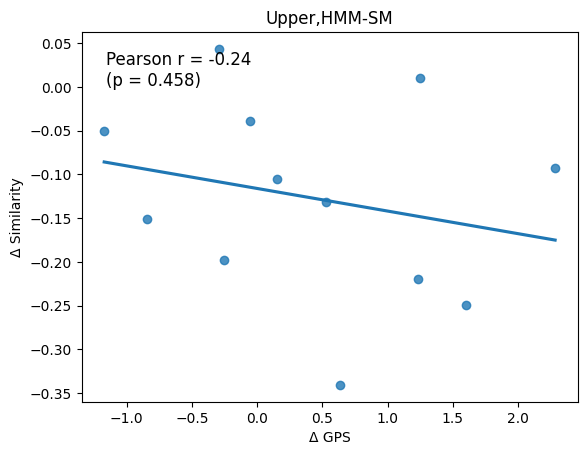

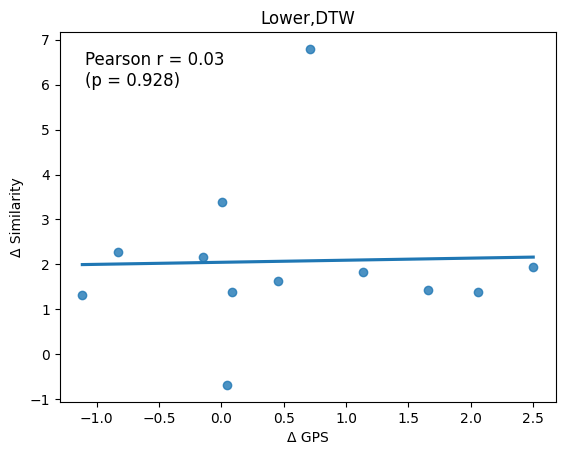

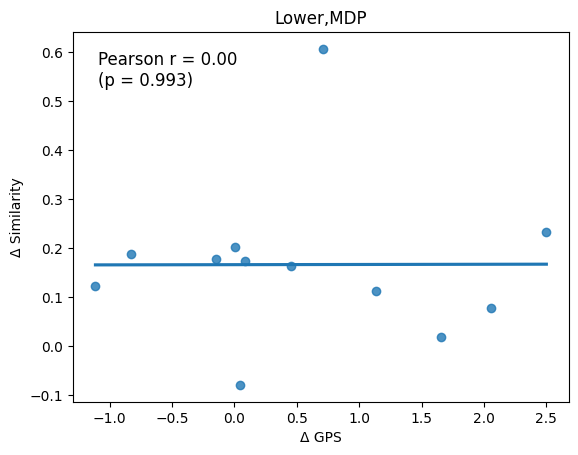

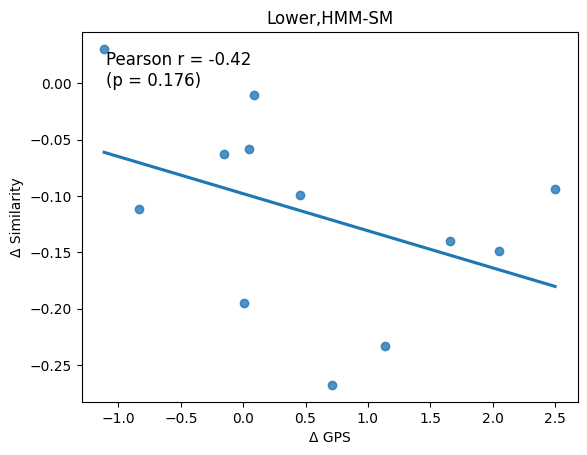

In [5]:
import numpy as np
import pandas as pd
import pingouin as pg
import os
from itertools import combinations
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from csv import writer


def calculate_srm(data1, data2):
    difference = data1 - data2
    mean_diff = np.mean(difference)
    std_diff = np.std(difference, ddof=1)
    return mean_diff / std_diff if std_diff != 0 else np.nan

file_path = r"Q:\main_propellab\Users\Ng, Gabe\Summer Student 2024\Manuscript\PrePostPT_Investigation\Results\Trial #3 - Gyro Data\PTlogresults_21-08-24_22-48.csv"
directory, filename = os.path.split(file_path)
basename, ext = os.path.splitext(filename)
#data = pd.read_csv(file_path, header=None)
data = pd.read_csv(file_path)
data.columns = ['FilePath', 'Sensor', 'GaitParam', 'Algorithm', 'Participant', 'X', 'Y']
data['Y'] = pd.to_numeric(data['Y'], errors='coerce')
#data['X'] = pd.to_numeric(data['X'], errors='coerce')


def analysis_byalgorithm(data, algorithm, sensor, parametric=True, correction='fdr_bh'):
    subset = data[(data['Algorithm'] == algorithm) & (data['Sensor'] == sensor)]
    print(f'Generating results for {algorithm}, {sensor}, number of data points: {len(subset)}')

    df = pd.DataFrame(columns=['Pre-Rehab','Post-Rehab'], index=range(len(data['Participant'].unique())))  # Initialize outside the loop
    df_difference = pd.DataFrame(columns=['Δ GPS','Δ Similarity'], index=range(len(data['Participant'].unique())))
    if not subset.empty:
        GPS = []
        Deviation_score = []
        for i, participant in enumerate(subset['Participant'].unique()):
            participant_data = subset[subset['Participant'] == participant].copy()
            if algorithm == "HMM-SM":
                baseline_GPS = participant_data['X'].apply(lambda x: float(x.split('-')[0].strip()) if isinstance(x, str) else x)
                participant_data = participant_data.iloc[1:]  # Remove the first entry for HMM-SM
                participant_data['X'] = participant_data['X'].apply(lambda x: float(x.split('-')[1].strip()) if isinstance(x, str) else x)
                
            
            participant_data['X'] = pd.to_numeric(participant_data['X'], errors='coerce')
            Y = participant_data['Y'].values.tolist()
            X = participant_data['X'].values.tolist()
            df.loc[i] = Y
            participant_data['Y_diff'] =  participant_data['Y'].iloc[1] -  participant_data['Y'].iloc[0]
            participant_data['X_diff'] =  participant_data['X'].iloc[1] - participant_data['X'].iloc[0]
            Y_diff = participant_data['Y_diff'].values.tolist()
            X_diff = participant_data['X_diff'].values.tolist()
            
            df_difference.at[i, 'Δ GPS'] = participant_data['X_diff'].iloc[0]
            df_difference.at[i, 'Δ Similarity'] = participant_data['Y_diff'].iloc[0]
            df_difference['Δ GPS'] = pd.to_numeric(df_difference['Δ GPS'], errors='coerce')
            df_difference['Δ Similarity'] = pd.to_numeric(df_difference['Δ Similarity'], errors='coerce')
    
        print(df_difference['Δ Similarity'])
        
    plt.figure()
    sns.regplot(data=df_difference, x=df_difference['Δ GPS'], y=df_difference['Δ Similarity'],ci=None).set_title(f"{sensor},{algorithm}")
    r_value, p_value = pearsonr(df_difference['Δ GPS'], df_difference['Δ Similarity'])
    
    d = {'sensor': sensor, 'algorithm':algorithm, 'r-value': r_value, 'p_value': p_value}
    results_df = pd.DataFrame(data=d, index=[0])
    plt.text(0.05, 0.95, f'Pearson r = {r_value:.2f}\n(p = {p_value:.3f})',
                 transform=plt.gca().transAxes,
                 fontsize=12,
                 verticalalignment='top')
    
    directory, filename = os.path.split(file_path)
    basename, ext = os.path.splitext(filename)
    image_filename = f"{basename}_{sensor}_{algorithm}.svg"
    image_file_path = os.path.join(directory, image_filename)
    plt.savefig(image_file_path)
    
    directory, filename = os.path.split(file_path)
    basename, ext = os.path.splitext(filename)
    new_filename = f"{basename}_pearsonr{ext}"
    output_file_path = os.path.join(directory, new_filename)

    # if not os.path.exists(output_file_path):
    #     results_df.to_csv(output_file_path, index=False)
    # else:
    #     results_df.to_csv(output_file_path, mode='a', header=False, index=False)

sensors = data['Sensor'].unique()
algorithms = data['Algorithm'].unique()

for sensor in sensors:
    for algorithm in algorithms:
        analysis_byalgorithm(data, algorithm, sensor, parametric=False, correction='fdr_bh')  # Set parametric to True or False as needed

In [10]:
import pandas as pd

# Load the original CSV file
file = r"C:\GP-WearablesAnalysis\examples\results_groupinfo_STSR_trial.csv"
df = pd.read_csv(file)  # Replace "your_file.csv" with your actual file name

# Function to calculate [Min, Max] for each participant
def calculate_min_max(df):
    participants = df['Participant'].unique()
    min_max_list = []

    for participant in participants:
        # Filter data for the current participant
        participant_data = df[df['Participant'] == participant]
        
        # Calculate min and max
        min_value = participant_data['Min'].min()
        max_value = participant_data['Max'].max()
        
        # Append the result as a dictionary
        min_max_list.append({
            "Participant": participant,
            "Min-Max": f"[{round(min_value,2)}, {round(max_value,2)}]"
        })

    # Create a new DataFrame for the Min-Max table
    min_max_df = pd.DataFrame(min_max_list)
    return min_max_df

# Calculate the [Min, Max] for each participant
min_max_df = calculate_min_max(df)

# Save the new DataFrame to a separate CSV file
min_max_df.to_csv(file, index=False)

print("Min-Max table has been saved to 'min_max_table.csv'.")

Min-Max table has been saved to 'min_max_table.csv'.
